# EUKARYA

In [70]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [71]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [72]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [73]:
# import data
denoisetable_eu = q2.Artifact.load('./results/denoisetable_eu.qza')
rep_seqs_eu = q2.Artifact.load('./results/rep_seqs_eu.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [74]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_eu,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-_zrs5z0j/33b1e814-210e-47dd-9824-63d73873857a/data/dna-sequences.fasta



inputfile = orig
578 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  501 / 578 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  570 / 578
done.

Progressive alignment 1/2... 
STEP    68 / 577 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   501 / 577 (thread    0) h
done.

Making a distance matrix from msa.. 
  500 / 578 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  570 / 578
done.

Progressive alignment 2/2... 
STEP   470 / 577 (thread    0) h
Reallocating..done. *alloclen = 1521
STEP   501 / 577 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --aut

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-d8vey79n/d9b70622-2ee1-4bb6-ae0a-ec2ff48bad39/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-d8vey79n/d9b70622-2ee1-4bb6-ae0a-ec2ff48bad39/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.11 seconds: Top hits for    511 of    578 seqs (at seed    500)
      0.24 seconds: Joined    200 of    575
      0.39 seconds: Joined    400 of    575
Initial topology in 0.50 seconds
Refining topology: 37 rounds ME-NNIs, 2 rounds ME-SPRs, 18 rounds ML-NNIs
      0.50 seconds: ME NNI round 1 of 37, 101 of 576 splits, 27 changes (max delta 0.003)
      0.65 seconds: SPR round   1 of   2, 101 of 1154 nodes
      0.83 seconds: SPR round   1 of   2, 301 of 1154 nodes
      1.01 seconds: SPR round   1 of   2, 501 of 1154 nodes
      1.19 seconds: SPR round   1 of   2, 701 of 115

## ALPHA AND BETA DIVERSITY

In [75]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_eu,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: b2562b5d-3e1d-44ae-a6db-01faf638371a>

In [76]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_eu,
#     max_depth = 30000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [77]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_30000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_30000.qzv')

In [78]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/eu_alpha_rarefaction_plot.png')

### ALPHA DIVERSITY

In [79]:
# set sampling_depth based on alpha rarefacation curve
depth = 14447
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_eu,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-9xv6j6i5/f108861a-d3cc-472b-af40-76e56ae253e0/data/feature-table.biom -t /tmp/qiime2-archive-hr054kam/cfdeaf93-0f67-4315-b607-6ea28b88acfd/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-ah51sspm

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-9xv6j6i5/f108861a-d3cc-472b-af40-76e56ae253e0/data/feature-table.biom -t /tmp/qiime2-archive-hr054kam/cfdeaf93-0f67-4315-b607-6ea28b88acfd/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-ka7pyklk

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0009518642337186682 and the largest is 0.3112591722494534.


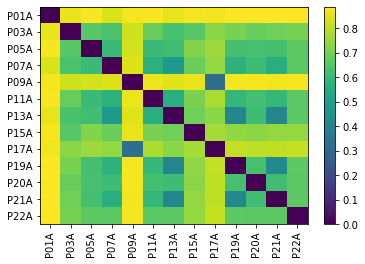

In [80]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

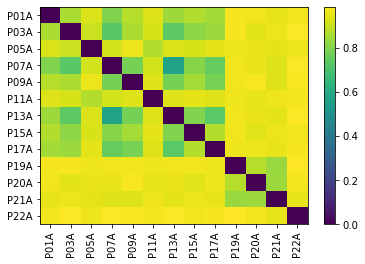

In [81]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [82]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 1da1a21f-765b-4ca3-88a1-b5f072f6a5b0>

In [83]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#     table = denoisetable_eu,
#     phylogeny = rooted_tree,
#     max_depth = depth,
#     metadata = sample_metadata,
#     metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#     steps =  100
# )

# alpha_rarefaction.visualization.save('./results/alpha_diversity_new.qzv')

In [84]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_diversity_new.qzv')
alpha_rar

<visualization: Visualization uuid: 4cb8a207-1427-431d-8dea-ab1cf0400973>

In [85]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,chao1,simpson,simpson_e,observed_features,dominance
Sample ID,,,,,
P01A,71.750000,0.819583,0.081511,68.0,0.180417
P03A,136.000000,0.886491,0.067768,130.0,0.113509
P05A,59.000000,0.822589,0.100654,56.0,0.177411
P07A,187.076923,0.812709,0.029337,182.0,0.187291
P09A,82.000000,0.447466,0.026615,68.0,0.552534
P11A,77.500000,0.815916,0.071478,76.0,0.184084
P13A,195.000000,0.654648,0.015568,186.0,0.345352
P15A,64.000000,0.886513,0.137681,64.0,0.113487
P17A,90.000000,0.667380,0.035370,85.0,0.332620


In [86]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
# ndf["color"] = ndf.groupby("population").ngroup()
# ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [87]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

df = pd.concat([df1, df2])
df

,year,population,value,type
Sample ID,,,,
P01A,2015,Linija reke Ljubljanice,68.000000,observed_features
P03A,2015,Linija reke Ljubljanice,130.000000,observed_features
P05A,2016,Dolenjska linija,56.000000,observed_features
P07A,2017,Linija reke Ljubljanice,182.000000,observed_features
P09A,2019,Linija reke Ljubljanice,68.000000,observed_features
P11A,2018,Linija reke Ljubljanice,76.000000,observed_features
P13A,2019,Linija reke Ljubljanice,186.000000,observed_features
P15A,2019,Linija reke Ljubljanice,64.000000,observed_features
P17A,2019,Linija reke Ljubljanice,85.000000,observed_features


/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/eukarya_obs-feat_chao1.png


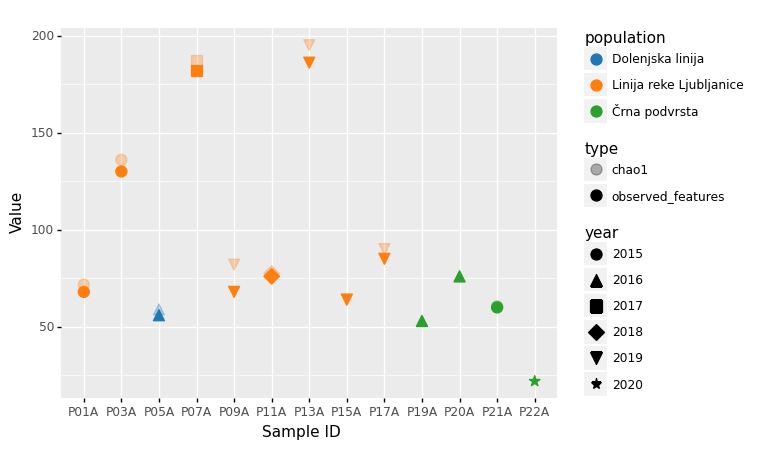

<ggplot: (8771648265765)>

In [88]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='value', shape='year', color='population', alpha='type'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='Value')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
)

p.save('./results/eukarya_obs-feat_chao1.png')

p

In [89]:
# shannon = (
#     ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
#     + geom_point(size=4)
#     + labs(x='Sample ID', y='shannon_entropy')
#     + scale_color_manual(['C0', 'C1', 'C2'])
# )

# shannon.save('./results/eukarya_shannon.png')
# shannon

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/eukarya_simpson_e.png


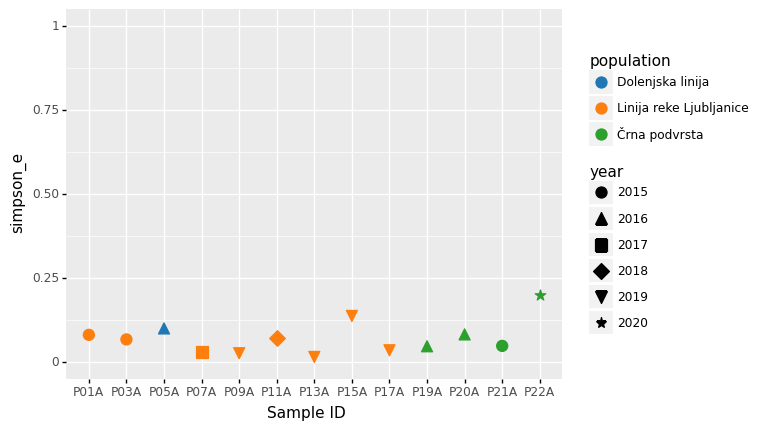

<ggplot: (8771653000045)>

In [90]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson_e')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/eukarya_simpson_e.png')
simpson 

In [91]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [92]:
# # simpson viz
# visualizations['simpson']

# # observed_features viz
# visualizations['observed_features']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

### BETA DIVERSITY

In [97]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_eu,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [98]:
# 2016 falls out
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_eu,
    metadata = sample_metadata,
    where = "[year] IN ('2015','2019')"
)

In [99]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 14448
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-omp3kg5p/e820e0a7-b49e-4522-bc04-222842998026/data/feature-table.biom -t /tmp/qiime2-archive-hr054kam/cfdeaf93-0f67-4315-b607-6ea28b88acfd/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-sw9m6stj

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-omp3kg5p/e820e0a7-b49e-4522-bc04-222842998026/data/feature-table.biom -t /tmp/qiime2-archive-hr054kam/cfdeaf93-0f67-4315-b607-6ea28b88acfd/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-f6w4lhbx

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0009372675297535673 and the largest is 0.3118012913082448.


In [100]:
depth = 14448
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-ub_4d0zc/7bbc13a4-bf31-461f-8729-caa95ff1aad6/data/feature-table.biom -t /tmp/qiime2-archive-hr054kam/cfdeaf93-0f67-4315-b607-6ea28b88acfd/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-x3r0pvp4

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-ub_4d0zc/7bbc13a4-bf31-461f-8729-caa95ff1aad6/data/feature-table.biom -t /tmp/qiime2-archive-hr054kam/cfdeaf93-0f67-4315-b607-6ea28b88acfd/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-w7c0n7qg

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0006582734461270933 and the largest is 0.2519540346072402.


#### PERMANOVA

In [101]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: 6a55f91c-778d-41b9-a3df-b3b8676569c6>

<Figure size 432x288 with 0 Axes>

In [102]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: ab8e49cc-68db-49cd-bdad-7c48411833a9>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [103]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: baa28849-46cf-490d-b8f1-f07a29887354>

<Figure size 432x288 with 0 Axes>

In [104]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: 6cdcbe1b-b1ca-46f0-b361-a93242ad1075>

<Figure size 432x288 with 0 Axes>